# Summative assessment
## Mathematics and Computational Methods of Complex Systems (MCMC 2022)

### Convenors: Fernando Rosas and Dhruva Raman

### TAs: Enrico Caprioglio, Ollie Saxby, Hanna Tolle, Robert Vava, Giles Winchester, Connagh Wrangle

### <span style="color:red">_Delivered on 05/12/2022 — to be returned on 10/01/2023, 18:00</span>_

This coursework is worth 100% of the module. Submission guidelines are as follows:

- Submission has to be done in PDF format over Canvas.

- Analytical work can be hand-written or typeset in Latex in a Jupyter notebook. Simulation code + analytical work can be presented separately, or integrated into a Jupyter notebook. In any case, submission should be done in PDF format.

- For the coding excersices, you may use any standard Python library you may need. If helpful, code from the module's labs can be reused. If you do so, please re-write and taylor it as much as you can to what the specific question is asking for.

- Note that Jupyter notebooks can be downloaded as PDF.

- For figures: make sure each figure uses labels, and that they aren't tiny.

There is no page limit, but conciseness of exposition is always best.

Any announcements related to the asignment will be done via the Canvas webpage. All questions related to the assessment shall be done via a dedicated Padlet: https://padlet.com/htolle/66hx1o2s02operwf


## Question 1 (16 marks)

Consider a symmetric matrix $A$, and the matrix $B=A^T A = A^2$.

a. *Show that if $\lambda$ is an eigenvalue of $A$, then $\lambda^2$ is an eigenvalue of $B$. (4 marks)*

b. *Show that $B$ is also a symmetric matrix, and use the eigenvalue decomposition of $A$ (i.e. that $A=U^T\Lambda U$) to find the eigenvalue decomposition of $B$. (4 marks)*

c. *Use the previous results as inspiration to construct a new matrix $C$ which has the same eigenvalues of $A$ and satisfies $C^T C = A$. Show that $C$ is also symmetric, and hence can be used to define the "square root" of a matrix (i.e. $\sqrt{A}=C$). (4 marks)*

d. *Design an algorithm that, given $A$, builds its corresponding $C$. Implement it in Python, and show that is works using one example. (4 marks)*

In [20]:
#Q1a - see PDF#workings
#Q1b - see PDF#workings
#Q1c - see PDF#workings

#Q1d
import numpy as np
from numpy.linalg import eig
a = np.array([[10, 1], [1, 5]])
def power_martix_calculator(matrix, power):
    values , vectors = eig(matrix)
    array_1 = np.power(values, power)
    res = np.diag(array_1)
    C = np.matmul(vectors,res)
    return np.matmul(C,vectors.transpose())

print(np.matmul(power_martix_calculator(a, 0.5),power_martix_calculator(a, 0.5)))
power_martix_calculator(a, 0.5)


[[10.  1.]
 [ 1.  5.]]


array([[3.15682075, 0.18569534],
       [0.18569534, 2.22834406]])

In [ ]:
#Q1d, code above shows example of A given 2X2 matrix converting to C, and multiplying to A

##  Question 2 (12 marks)
Here we will calculate the critical values of the function $f(x,y) = (x-1)^4 + (y-4)^2$ (i.e. the values of $x$ and $y$ for which the gradient of $f$ is zero) in two alternative ways.

a. *Calculate the gradient of $f$ analytically. (4 marks)*

b. *Find the critical values of $f$ by equating the gradient found in the previous item to zero. How many critical values does the function have? Use techniques to identify if the values found are a minimum, a maximum, or a saddle point. (4 marks)*

c. *Make a code implementing gradient descent on $f$. Confirm if the resulting solution is equal to the one provided in the previous point. (4 marks)*

In [2]:
#Q2a see pdf#workings
#Q2b see pdf#workings

#Q2c
import autograd as ad
import numpy as np
def f(x,y):
    return (x-1)**4 + (y-4)**2

# get analytical gradients of y w.r.t the variables
dy_dx1 = ad.grad(f, 0)
dy_dx2 = ad.grad(f, 1)


# define starting values, step size
x, y = 0.1, 0.1
step_size = 0.02
num_iterations = 10000

ys = []
for iteration in range(num_iterations):

    # record value
    y_value = f(x, y)
    ys.append(y_value)
    if iteration % 100 == 0:
        print(f'at iteration {iteration}, y({x:.2f}, {y:.2f}) = {y_value}')

    # compute gradients
    der_x1 = dy_dx1(x, y)
    der_x2 = dy_dx2(x, y)

    # update variables to minimize
    x -= step_size * der_x1
    y -= step_size * der_x2
print("value of point is approaching (1,4) as n --> infinity")

at iteration 0, y(0.10, 0.10) = 15.8661
at iteration 100, y(0.76, 3.93) = 0.007572034143265842
at iteration 200, y(0.83, 4.00) = 0.0008850082994050833
at iteration 300, y(0.86, 4.00) = 0.00040509198079878583
at iteration 400, y(0.88, 4.00) = 0.0002315401433047883
at iteration 500, y(0.89, 4.00) = 0.00014965180257633153
at iteration 600, y(0.90, 4.00) = 0.00010462213022834848
at iteration 700, y(0.91, 4.00) = 7.72387600865618e-05
at iteration 800, y(0.91, 4.00) = 5.935398033786268e-05
at iteration 900, y(0.92, 4.00) = 4.7032825038395864e-05
at iteration 1000, y(0.92, 4.00) = 3.8185653961303486e-05
at iteration 1100, y(0.93, 4.00) = 3.1619229075235326e-05
at iteration 1200, y(0.93, 4.00) = 2.661191731847256e-05
at iteration 1300, y(0.93, 4.00) = 2.2706479723883084e-05
at iteration 1400, y(0.93, 4.00) = 1.9601798241679886e-05
at iteration 1500, y(0.94, 4.00) = 1.7093013318211934e-05
at iteration 1600, y(0.94, 4.00) = 1.5036825789460707e-05
at iteration 1700, y(0.94, 4.00) = 1.333056098904

## Question 3 (12 marks)

Verify the fundamental theorem of calculus in a concrete example.

a. *Consider the function $f(x)=2\cos(x) + x^3 + e^x$, and calculate analytically $G(y) = \int_0^y f(x) dx$. (4 marks)*

b. *Now, calculate the derivative of $G(x)$ as found in the previous example, and show that $G'(x) = f(x)$. (4 marks)*

c. *Plot $G(x)$ for $x$ from 0 to 10, and use the values of $f(x)$ to draw the tangent lines of $G$ every 1 units of $x$ (i.e. at $x=1$, $x=2$,..., and $x=9$). (4 marks)*

Text(0, 0.5, 'y')

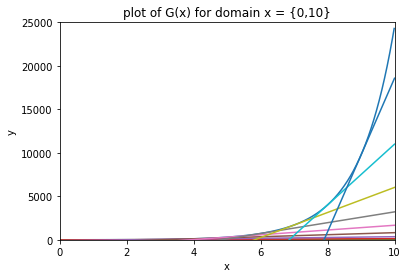

In [3]:
#Q3a see pdf#working
#Q3b see pdf#working
#q3c 
import matplotlib.pyplot as plt
def G(x):
    return 2*np.sin(x)+0.25*x**4+np.exp(x)-1
def F(x):
    return 2*np.cos(x)+x**3+np.exp(x)
x_1 = np.arange(0,10,0.01)
y = []
straight_line = []
c = []
for i in x_1:
    y.append(G(i))
    if i%1 == 0:
        straight_line.append(F(i))
        c.append(G(i)-F(i)*i)
plt.plot(x_1,y)        
for j in range(0,10):
    x = np.linspace(0,10,200)
    y = straight_line[j]*x + c[j]
    plt.plot(x,y)
    
plt.xlim([0, 10])
plt.ylim([0, 25000])
plt.title("plot of G(x) for domain x = {0,10}")
plt.xlabel("x")
plt.ylabel("y")
#plt.show()



## Question 4 (20 marks)

Here we will explore how to implement a linear regression model via gradient descent. For this, we will use the following "dataset", which you can re-generate for different values of the parameters $a$ and $b$.



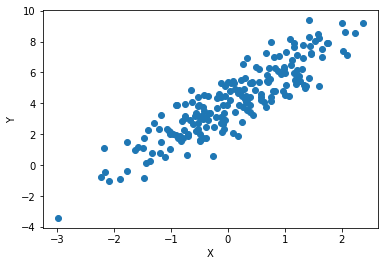

In [2]:
from numpy.random import normal
import matplotlib.pyplot as plt

a = 4 # height
b = 2 # slope

# generate data
N = 200 # sample size
X = normal(loc=0.0, scale=1.0, size=N)
W = normal(loc=0.0, scale=1.0, size=N)
Y = a + b*X + W

# plot data
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Let us consider now the model given by $F(x,w_1,w_2) = w_1 + w_2 x$, which has two parameters $w_1$ and $w_2$. We want to adjust the values of $w_1$ and $w_2$ so that $F$ is a good approximation of the 'data' $Y$ plotted above. For this purpose, let's do the following:

a. *Write a python function that takes as arguments $X$ and $Y$, and returns the mean square error of $F$ given by
$$ E(w_1,w_2) = \frac{1}{N} \sum_{i=1}^N ( w_1 + w_2 x_i - y_i )^2,$$
where $x_i$ and $y_i$ are the i-th element of the arrays $X$ and $Y$, respectively. (4 marks)*

b. *Calculate the gradient of $E(w_1,w_2)$ analytically. Then, implement a function that calculates the gradient in Python. (4 marks)*

c. *Using the function of the previous item, implement a gradient descent algorithm that can estimate good values of $w_1$ and $w_2$. Show that it works, i.e. that the final values of $w_1$ and $w_2$ are similar to the ones of $a$ and $b$ used above to generate the data. (4 marks)*

d. *Make a plot including a scatter plot of the data $Y$ (i.e. same as above), a linear function using the initial values of $w_1$ and $w_2$, a linear function using it final values, and a linear function using the values of $a$ and $b$. Make sure to add plot labels for the linear functions so we know which is which! (4 marks)*

e. *Write another python function for the following error function:*
$$ \tilde{E}(w_1,w_2) = \frac{1}{N} \sum_{i=1}^N ( w_1 + w_2 x_i - y_i )^4.$$
*Calculate analytically the gradient of $\tilde{E}$, and implement another python function that calculates it. (4 marks)*

In [10]:
#q4a)
from numpy.random import normal
import matplotlib.pyplot as plt
import random
random.seed(4)
def error_function(X, Y, omega_1, omega_2):
#a = 4 # height
#b = 2 # slope

# generate data
#N = 200 # sample size
#X = normal(loc=0.0, scale=1.0, size=N)
#W = normal(loc=0.0, scale=1.0, size=N)
#Y = a + b*X + W

    F = omega_1 + omega_2*X

    errtot = 0
    err = 0
    for i in range(0,len(Y)):
        err = (F[i] - Y[i])**2
        errtot += err
    return errtot
a = 4 # height
b = 2 # slope

# generate data
N = 10 # sample size
X = normal(loc=0.0, scale=1.0, size=N)
W = normal(loc=0.0, scale=1.0, size=N)
Y = a + b*X + W
value = error_function(X, Y, 4, 2)
print("error function value at omega1=4, omega2=2 is :" + str(value))




error function value at omega1=4, omega2=2 is :2.7076226454721146


In [11]:
#Q4b)
#see pdf#workings + code below

In [32]:
pip install autograd

Note: you may need to restart the kernel to use updated packages.


In [12]:
#Q4b)
import numpy as np
import autograd as ad
random.seed(11)
def ygrad(omega_1, omega_2):
    a = 4 # height
    b = 2 # slope

    # generate data
    N = 10 # sample size
    X = normal(loc=0.0, scale=1.0, size=N)
    W = normal(loc=0.0, scale=1.0, size=N)
    Y = a + b*X + W
    F = omega_1 + omega_2*X
    errtot = 0
    err = 0
    for i in range(0,len(Y)):
        err = (F[i] - Y[i])**2
        errtot += err
    return errtot

# get analytical gradients of y w.r.t the variables
    dy_dx1 = ad.grad(y, 0)
    dy_dx2 = ad.grad(y, 1)
    return (dy_dx1, dy_dx2)
value = ygrad(3,4)
print("error function gradient value at omega1=3, omega2=3 is :" + str(value))

error function gradient value at omega1=3, omega2=3 is :52.97856012063285


In [13]:
#Q4c
import numpy as np
import autograd as ad
random.seed(24)
# define your function to mimimize
def y(omega_1, omega_2):
    a = 4 # height
    b = 2 # slope

    # generate data
    N = 10 # sample size
    X = normal(loc=0.0, scale=1.0, size=N)
    W = normal(loc=0.0, scale=1.0, size=N)
    Y = a + b*X + W
    F = omega_1 + omega_2*X
    errtot = 0
    err = 0
    for i in range(0,len(Y)):
        err = (F[i] - Y[i])**2
        errtot += err
    return errtot

# get analytical gradients of y w.r.t the variables
dy_dx1 = ad.grad(y, 0)
dy_dx2 = ad.grad(y, 1)

# define starting values, step size
omega_1, omega_2 = 0.0, 0.0
step_size = 0.01
num_iterations = 100

ys = []
for iteration in range(num_iterations):

    # record value
    y_value = y(omega_1, omega_2)
    ys.append(y_value)
    print(f'at iteration {iteration}, y({omega_1:.1f}, {omega_2:.1f}) = {y_value}')

    # compute gradients
    der_x1 = dy_dx1(omega_1, omega_2)
    der_x2 = dy_dx2(omega_1, omega_2)

    # update variables to minimize
    omega_1 -= step_size * der_x1
    omega_2 -= step_size * der_x2
print("value of point is approaching (4,2) as n --> infinity")

at iteration 0, y(0.0, 0.0) = 313.1257847501856
at iteration 1, y(0.8, 0.1) = 108.22052249328287
at iteration 2, y(1.5, 0.9) = 82.83305385861865
at iteration 3, y(2.2, 1.3) = 47.953022577509145
at iteration 4, y(2.6, 1.3) = 10.406471029225987
at iteration 5, y(2.8, 1.3) = 36.85304092318222
at iteration 6, y(2.9, 1.6) = 13.344394350904347
at iteration 7, y(3.0, 1.8) = 19.287364716805225
at iteration 8, y(3.3, 1.9) = 15.615505062970017
at iteration 9, y(3.5, 1.9) = 15.12843813671912
at iteration 10, y(3.7, 1.9) = 9.703476854377564
at iteration 11, y(3.8, 1.9) = 16.804621896633915
at iteration 12, y(3.7, 1.9) = 5.037020263246026
at iteration 13, y(3.7, 2.1) = 8.867279853039825
at iteration 14, y(3.8, 2.1) = 8.483268831698913
at iteration 15, y(3.7, 2.0) = 16.650991292786067
at iteration 16, y(3.6, 1.9) = 13.329019634460895
at iteration 17, y(3.6, 1.9) = 11.60965691050015
at iteration 18, y(3.8, 1.9) = 9.470452510570281
at iteration 19, y(3.8, 2.0) = 3.6083225391280407
at iteration 20, y(3

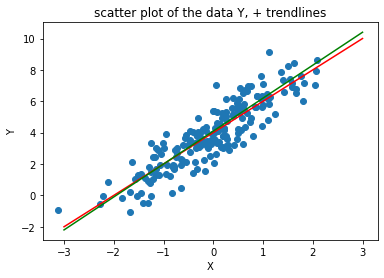

In [15]:
#q4d
from numpy.random import normal
import matplotlib.pyplot as plt
random.seed(12)
a = 4 # height
b = 2 # slope

# generate data
N = 200 # sample size
X = normal(loc=0.0, scale=1.0, size=N)
W = normal(loc=0.0, scale=1.0, size=N)
Y = a + b*X + W
x = np.linspace(-3,3,200)
y = a + b*x
plt.plot(x, y, '-r', label='y=2 + 4x + W')

a = 4.1 # height
b = 2.1 # slope
x = np.linspace(-3,3,200)
y = a + b*x
plt.plot(x, y, '-g', label='y=2 + 4x + W')
# plot data
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("scatter plot of the data Y, + trendlines")
plt.show()


In [16]:
#q4e see pdf#workings + code below
import numpy as np
import autograd as ad
random.seed(33)
def ygrad(omega_1, omega_2):
    a = 4 # height
    b = 2 # slope

    # generate data
    N = 10 # sample size
    X = normal(loc=0.0, scale=1.0, size=N)
    W = normal(loc=0.0, scale=1.0, size=N)
    Y = a + b*X + W
    F = omega_1 + omega_2*X
    errtot = 0
    err = 0
    for i in range(0,len(Y)):
        err = (F[i] - Y[i])**4
        errtot += err
    return errtot

# get analytical gradients of y w.r.t the variables
    dy_dx1 = ad.grad(y, 0)
    dy_dx2 = ad.grad(y, 1)
    return (dy_dx1, dy_dx2)
value = ygrad(3,4)
print("error(bar) function gradient value at omega1=3, omega2=4 is :" + str(value))

error(bar) function gradient value at omega1=3, omega2=4 is :352.3383891598113


## Question 5 (15 marks)

### Game 1

You are presented with three locked boxes: $B_1$, $B_2$, and $B_3$. One of the boxes contains $£X$, but you don't know which. The others are empty. You will choose one of the boxes, with uniform probability.

- Let's call the box with the money $B_R$. So for instance, if the first box has the money, we write $B_R = B_1$.

- Let's call the chosen box $B_C$. So if we choose the third box, we write $B_C = B_3$.

a. *Describe the outcome space (i.e. sample space). It might help to note that there are **two** uncertain events here*     (2 marks)

b. *Once you choose a box, it is unlocked and you are allowed to keep the money, if there is any. Let $R$ be a random variable whose value is the amount of money you earn. Calculate $\mathbb {E}[R]$ (your expected reward), and $var(R)$ (variance of the reward).* (4 marks)

*The steps you took to get there should be concise but clear....I don't want just two numbers as the answer!*

### Game 2

1. After you have chosen a box, you are **no longer allowed to immediately open it**. Instead, I open one of the empty boxes that **don't have** any money, and show you that they are empty.
2. Then you have the option to **stick** with your initial choice, or **swap** to the final (unopened, unchosen) box. 


3. Finally your chosen box (whether your original choice or the swapped one) is opened and you can take the reward inside, if there is any.


c. *What are the expected value and variance of your reward if you use the 'stick' strategy? What about if you use the 'swap' strategy?*   (4 marks)

*Hint: Separate outcomes into two events: 1. that you initially, unknowingly choose the correct box, and 2. that you choose one of the incorrect boxes*




d. Instead of having one box with a reward amongst three total boxes, suppose we have $K$ boxes with a reward out of $N$ total boxes. What are the expected value and the variance of the reward now for the swap strategy? (5 marks)

In [ ]:
#q5 see pdf#workings for all questions

## Question 6 (25 marks)
Recall the Lotka volterra model of predator-prey interactions from the lectures:

$$
\begin{align}
\dot{N}(t) &= a N(t) - b N(t) P(t) \\
\dot{P}(t) &= c N(t) P(t) - d P(t)
\end{align}
$$

where $N(t)$ is the number of prey, $P(t)$ is the number of predators, $a$ and $b$ are the birth and death rates of prey. $c$ and $d$ are the birth and death rates of predators.

**a) In this model, what do the dynamics of the prey population over time look like in the absence of predators ($P(0) = 0$)? Do you think this is reasonable? (*A verbal description without maths is sufficient, although you are welcome to use equations if you like*)** (3 marks)


A common alteration of the birth rate in Lotka-Volterra-style models, which somewhat deals with the issue raised in question a), is the following: 

$$
\begin{align}
\dot{N}(t) = a N(t) \left(1 - \frac{N(t)}{K} \right)
\end{align}
$$

where $K > 1$ is a parameter we will ask you to describe. 

**b) Can you verbally describe how this deals with the issue of question a? What is the maximum value the prey population could take after starting from an initial population of $1$? How would you interpret the parameter $K$?** (3 marks)

We are now going to deal with a model of **species competition**. Two species which don't predate on each other, but compete for a limited food source. Their respective populations are $N_1(t)$ and $N_2(t)$.

$$
\begin{align}
\dot{N}_1(t) &= r_1 N_1(t) \left(1 - \frac{N_1(t)}{K_1} - b_{12} \frac{N_2}{K_1} \right) \\
\dot{N}_2(t) &= r_2 N_1(t) \left(1 - \frac{N_2(t)}{K_2} - b_{21} \frac{N_1}{K_2} \right)
\end{align}
$$

Notice that the differential equation describing population change of each species $N_i$, is exactly the same as for the differential equation of question b, except it includes an additional term $b_{ij} \frac{N_j}{K_i}$. This term models inter-species competition. For instance, if $N_2(t)$ is large, this term exerts a negative pull on the population growth rate of $N_1(t)$.


We are now going to reduce the number of parameters in our model by **nondimensionalisation**. The nondimensionalised model is:

$$
\begin{align}
\frac{\text{d} u_1}{\text{d} \tau}(\tau) &= u_1(\tau) \left(1 - u_1(\tau) - a_{12}u_2(\tau) \right) \\
\frac{\text{d} u_2}{\text{d} \tau}(\tau) &= \rho u_2(\tau) \left(1 - u_2(\tau) - a_{21}u_1(\tau) \right) 
\end{align}
$$

where the new parameters, expressed in terms of the original parameters, are:

$$
u_1 = \frac{N_1}{K_1}, \quad u_2 = \frac{N_2}{K_2}, \quad \tau = r_1 t, \quad \rho = ????? \\
a_{12} = b_{12}\frac{K_2}{K_1} \quad a_{21} = b_{21}\frac{K_1}{K_2}
$$

**c) Figure out what $\rho$ is, in terms of the parameters of the original equation. Describe what it represents biologically**  (Possible even if you couldn't find its formula using common sense and after running the simulations below) (2 marks)




**d) We're now going to simulate the differential equation several times. So write some code for simulating the differential equation, using ```scipy.integrate.solve_ivp```. Of course, to actually simulate the system, you will need initial conditions and parameter values:** (4 marks)

- For each simulation, we are going to have the following initial conditions:

$$ u_1(0) = u_2(0) = 0.1 $$

However, we will change the parameters repeatedly, to see how they influence the behaviour of the model.

Simulate repeatedly with each of the following sets of parameter values (no need to write or plot anything for the report). The point of this is only to get a feel for how the model behaviour changes with the parameters.

$$ a_{12} = 0.9 \quad a_{21} = 1.1 \quad \rho = 1.6 $$
$$ a_{12} = 1.1 \quad a_{21} = 0.9 \quad \rho = 1.6 $$
$$ a_{12} = 1.1 \quad a_{21} = 0.9 \quad \rho = 0.6 $$
$$ a_{12} = 1.1 \quad a_{21} = 0.9 \quad \rho = 0.6 $$
$$ a_{12} = 0.6 \quad a_{21} = 0.4 \quad \rho = 5 $$
$$ a_{12} = 0.4 \quad a_{21} = 0.6 \quad \rho = 5 $$


e) From simulating, with these parameter combinations, what seems to be more important for long term species survival in this model: its natural growth rate or the degree to which it is suppressed by its competitor? Plot ONE simulation from the parameter values above that supports your conclusion. (3 marks)


f) **Now calculate the four fixed points of the differential equation**. You will find three are easier, and one is harder. **For all four fixed points, briefly describe (1/2 sentences) what each fixed point represents in terms of the competition between the two species.** Although you don't need the previous simulations for this question, they might be a useful sanity check for your answers!  (5 marks)



Our system of differential equations is in the general form:

$$ \dot{x}(t) = f\big(x(t) \big), $$

where $x(t)$ is the vector $[u_1(\tau), u_2(\tau)]$. Note that $\tau$ is just time with rescaled units (like minutes vs seconds), so you can treat it as time.

g) **Calculate the Jacobian matrix (2 marks) $$ J(x) = \frac{\text{d} f}{\text{d} x}(x) $$**

h) **Evaluate this Jacobian matrix at the two fixed points you arrive at when using the parameters:** 

$$ a_{12} = 0.9 \quad a_{21} = 1.1 \quad \rho = 1.6 $$
$$ a_{12} = 1.1 \quad a_{21} = 0.9 \quad \rho = 1.6 $$

**What are the requirements on the values of $a_{12}$ and $a_{21}$ for these fixed points to be stable?** (3 marks)


To do this, figure out conditions on when the Jacobian matrix has appropriate eigenvalues. You don't necessarily need to calculate the individual eigenvalues. Instead note that 

1. The trace (sum of diagonal elements) of the matrix is equal to the sum of eigenvalues
2. The determinant of the matrix is equal to the product of the eigenvalues

...and we only need to know the sum and product of two numbers (the eigenvalues) to see if they are both negative!



In [23]:
#q6a see pdf#workings
#q6b see pdf#workings
#q6c see pdf#workings

#Q6d
import numpy as np
from scipy import integrate
def f(t, y):
    n1 = y[0]
    n2 = y[1]
    fx = n1*(1-n1-a12*n2)
    fy = rho*n2*(1-n2-a21*n1)
    return [1*(1-n1-a12*n2), rho*n2*(1-n2-a21*n1)]

a12 = 0.9
a21 = 1.1
rho = 1.6

sol = integrate.solve_ivp(f, t_span = [0, 10], y0 = [0.1, 0.1], t_evel = np.linspace(0,10,100))
x, y = sol.y
print("a12 = " + str(a12) + " a21 = " + str(a21) + " rho = " + str(rho) )
print(x)
print(y)

a12 = 1.1
a21 = 0.9
rho = 1.6

sol = integrate.solve_ivp(f, t_span = [0, 10], y0 = [0.1, 0.1], t_evel = np.linspace(0,10,100))
x, y = sol.y
print("a12 = " + str(a12) + " a21 = " + str(a21) + " rho = " + str(rho) )
print(x)
print(y)

a12 = 1.1
a21 = 0.9
rho = 0.6

sol = integrate.solve_ivp(f, t_span = [0, 10], y0 = [0.1, 0.1], t_evel = np.linspace(0,10,100))
x, y = sol.y
print("a12 = " + str(a12) + " a21 = " + str(a21) + " rho = " + str(rho) )
print(x)
print(y)

a12 = 0.6
a21 = 0.4
rho = 5

sol = integrate.solve_ivp(f, t_span = [0, 10], y0 = [0.1, 0.1], t_evel = np.linspace(0,10,100))
x, y = sol.y
print("a12 = " + str(a12) + " a21 = " + str(a21) + " rho = " + str(rho) )
print(x)
print(y)

a12 = 0.4
a21 = 0.6
rho = 5

sol = integrate.solve_ivp(f, t_span = [0, 10], y0 = [0.1, 0.1], t_evel = np.linspace(0,10,100))
x, y = sol.y
print("a12 = " + str(a12) + " a21 = " + str(a21) + " rho = " + str(rho) )
print(x)
print(y)


a12 = 0.9 a21 = 1.1 rho = 1.6
[0.1        0.15362296 0.49350925 0.66294823 0.74248676 0.786491
 0.81962907 0.85191946 0.88753624 0.9137184 ]
[0.1        0.10868099 0.17800213 0.21286784 0.21443294 0.19861871
 0.17381915 0.14340981 0.10833373 0.08267053]
a12 = 1.1 a21 = 0.9 rho = 1.6
[0.1        0.15212241 0.47684261 0.61539475 0.64869554 0.63474165
 0.59744587 0.54200545 0.46395076 0.35981362 0.33546609]
[0.1        0.10897343 0.19294912 0.26479735 0.31575443 0.35703797
 0.40058129 0.45524174 0.52970032 0.62733727 0.65088124]
a12 = 1.1 a21 = 0.9 rho = 0.6
[0.1        0.15335638 0.51256066 0.70000324 0.77715628 0.79664489
 0.79015052 0.77068855 0.73971292 0.73437478]
[0.1        0.10335255 0.13078955 0.15213531 0.16834311 0.18261372
 0.19840191 0.21897824 0.24867126 0.253799  ]
a12 = 0.6 a21 = 0.4 rho = 5
[0.1        0.14846738 0.32218733 0.44133971 0.46719191 0.48806296
 0.49851407 0.50638824 0.51309157 0.51872394 0.52242619 0.52390946
 0.52487049 0.52546013 0.52577617 0.52593587 0.526

[0.1        0.15362296 0.49350925 0.66294823 0.74248676 0.786491
 0.81962907 0.85191946 0.88753624 0.9137184 ]
[0.1        0.10868099 0.17800213 0.21286784 0.21443294 0.19861871
 0.17381915 0.14340981 0.10833373 0.08267053]


Text(0, 0.5, 'proportion of total population from a maximum value')

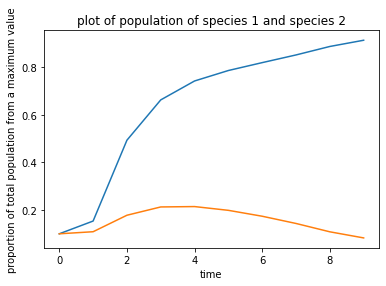

In [19]:
#Q6e
# suppression by competitor when a12 or a21 > 1 seems to be the dominat term determining species population
#here a21 > 1
a12 = 0.9
a21 = 1.1
rho = 1.6

sol = integrate.solve_ivp(f, t_span = [0, 10], y0 = [0.1, 0.1], t_evel = np.linspace(0,10,100))
x, y = sol.y
print(x)
print(y)
import matplotlib.pyplot as plt
t_span = range(0,10,1)
plt.plot(t_span,x)
plt.plot(t_span,y)
plt.title("plot of population of species 1 and species 2")
plt.xlabel("time")
plt.ylabel("proportion of total population from a maximum value")

In [ ]:
#as we can see from the plot, species 1 dominates species 2 over time

In [ ]:
#q6f see pdf#workings
#q6g see pdf#workings
#q6h see pdf#workings